# <center>TP Nro 1: Programación básica 2021 1C </center>
### Integrantes: Franco Areco - Luna Isaias - Franco Rebora 

En la celda a continuacion, se importan las librerias usadas a lo largo del trabajo. En el caso del modulo llamado dsp, se refiere al archivo 'dsp.py' que se encuentra en la misma carpeta del Notebook.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import time
from dsp import *

## <u>Ejercicio 1</u>:
Generar una señal discreta, a partir de una señal $x(t)$, de un 1 segundo de duración, compuesta por
tres funciones $x_1(t)+ x_2(t) + x_3(t)$ como se definen a continuación:

$x_1 (t) = 2$ <br>
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$x_3 (t) = sen(2 \pi f_2 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 0.5kHz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>


En todos los casos, la frecuencia de muestreo es <b>$f_s = 44.1$kHz </b>. Graficar cada señal por separado y
la señal total.

## <u>Respuesta</u>: 
#### Se definen las variables y se realizan las operaciones:

In [2]:
t = 1
fs = 44100
vector_t = np.linspace(0,t,t*fs)

f2 = 10000
u2 = 0.2
sigma2 = 0.05
exp2 = ((vector_t-u2)**2)/(2*(sigma2**2))

f3 = 500
u3 = 0.7
sigma3 = 0.07
exp3 = ((vector_t-u3)**2)/(2*(sigma3**2))

x1 = 2*np.ones_like(vector_t)
x2 = np.cos(2*np.pi*f2*vector_t)*(np.e**(-exp2))
x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))
x = x1+x2+x3

#### Plot:

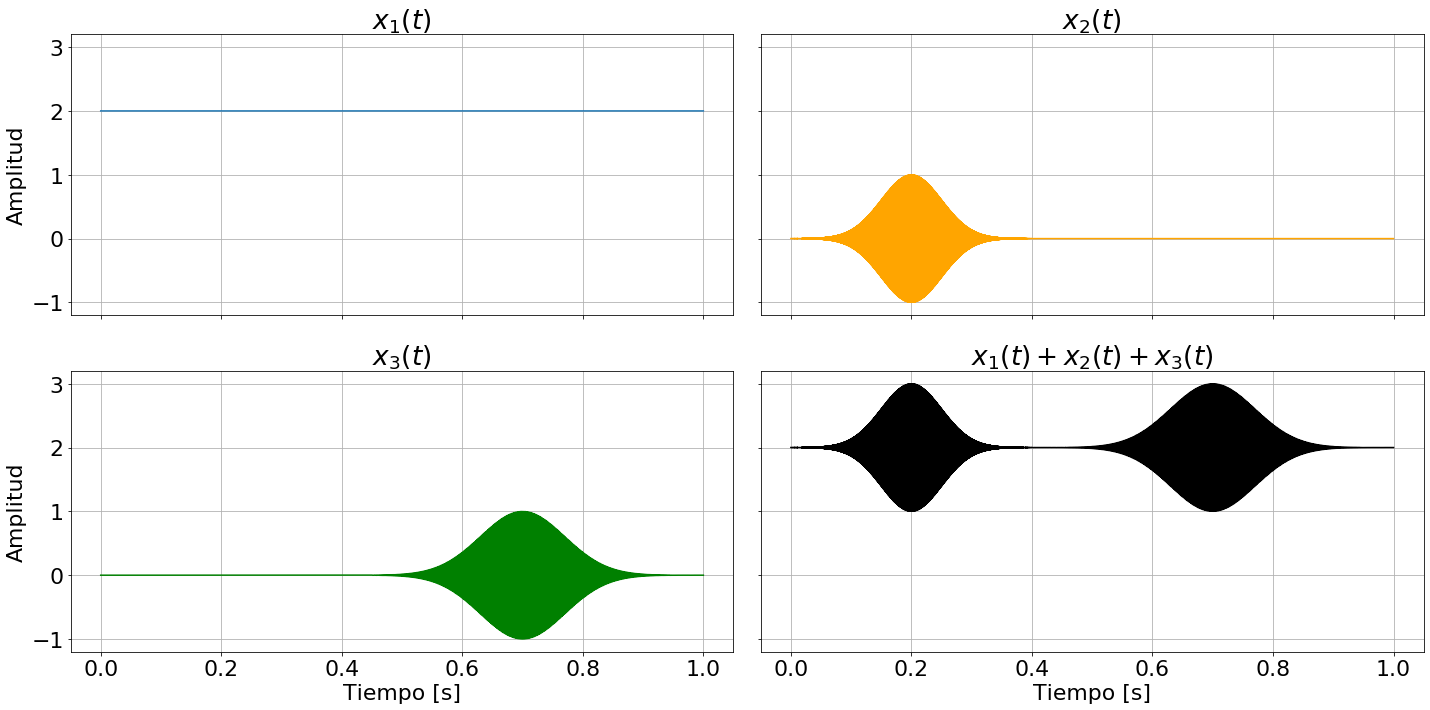

In [3]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, x1)
axs[0, 0].set_title('$x_1(t)$')
axs[0, 1].plot(vector_t, x2, color='orange')
axs[0, 1].set_title('$x_2(t)$')
axs[1, 0].plot(vector_t, x3, color='green')
axs[1, 0].set_title('$x_3(t)$')
axs[1, 1].plot(vector_t, x, color='black')
axs[1, 1].set_title('$x_1(t) + x_2(t) + x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')


for ax in axs.flat:
    ax.grid()

## <u>Ejercicio 2</u>:
Implementar funciones que permitan calcular el valor medio $\mu$, la desviación respecto del promedio d, la desviación estándar $\sigma$ y el valor RMS de acuerdo a las definiciones dadas debajo para una señal de entrada discreta $x[n]$ de longitud finita $N$. Estas funciones deben estar disponibles para reutilizarse en otros puntos.

Valor medio: $\mu = \frac{1}{N} \sum_{n=0}^{N-1} x[n]$ <br>
Desvío medio: $d = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]-\mu|$ <br>
Desvío estándar: $\sigma = \sqrt{\frac{1}{N-1} \sum_{n=0}^{N-1} |(x[n]-\mu)^2|}\;\;\;\;\;\;\;\;$Varianza:$\sigma^2$<br>
RMS: $\sigma = \sqrt{\frac{1}{N} \sum_{n=0}^{N-1} |(x[n])^2|}$

Aplicar cada una de las funciones anteriores a la señal generada en el punto 1 y mostrar los
resultados.

## <u>Respuesta</u>: 


In [4]:
print('Valor medio: ', round(valor_medio(x),3))
print('Desvio medio: ', round(desvio_medio(x),3))
print('Desvio estandar: ', round(desvio_estandar(x),3))
print('Varianza: ', round(desvio_estandar(x)**2,3))
print('RMS: ', round(rms(x),3))

Valor medio:  2.0
Desvio medio:  0.191
Desvio estandar:  0.326
Varianza:  0.106
RMS:  2.026


## <u>Ejercicio 3</u>:
Generar señales aleatorias, normalmente distribuidas (Gaussiana), con valor medio nulo y desviación estándar unitaria, para simular una señal de ruido. Calcular para las longitudes (N) dadas en la tabla, la desviación estándar ($\sigma$) en cada caso y determinar la diferencia porcentual($\%$) entre lo calculado y lo esperado ($\sigma$ = 1). Utilizar funciones ya existentes para la generación de las señales aleatorias.

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>&nbsp; &nbsp; &nbsp; &nbsp;N&nbsp; &nbsp; &nbsp; &nbsp;</b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>$\sigma$</b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>%</b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>5</i>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>10</i>
			<br>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp;
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>100</i>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			1000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			10000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			100000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
</table>

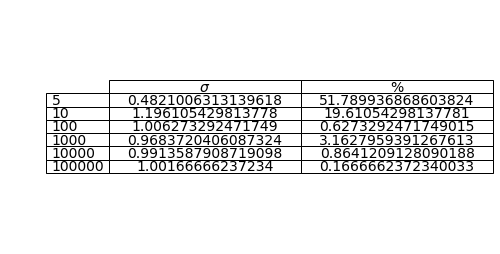

In [5]:
v1 = np.random.randn(5)
v2 = np.random.randn(10)
v3 = np.random.randn(100)
v4 = np.random.randn(1000)
v5 = np.random.randn(10000)
v6 = np.random.randn(100000)

d1 = desvio_estandar(v1)
d2 = desvio_estandar(v2)
d3 = desvio_estandar(v3)
d4 = desvio_estandar(v4)
d5 = desvio_estandar(v5)
d6 = desvio_estandar(v6)

p1 = abs(d1-1)*100
p2 = abs(d2-1)*100
p3 = abs(d3-1)*100
p4 = abs(d4-1)*100
p5 = abs(d5-1)*100
p6 = abs(d6-1)*100

fig = plt.figure()
plt.axis('off')
plt.axis('tight')

data = [[d1, p1],
        [d2, p2],
        [d3, p3],
        [d4, p4],
        [d5, p5],
        [d6, p6]]


columns = (['$\sigma$', '$\%$'])
rows = (["5", "10", "100", "1000", "10000", "100000"])

# Add a table at the bottom of the axes
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center',
                      cellLoc='center',
                      colLoc='center')
fig.tight_layout()
plt.show()

## <u>Ejercicio 4</u>:

A la señal generada en el punto 1 ($x[n]$), sumarle ruido de media cero y desvíos de $\sigma = 0.1$, $\sigma = 1$ y $\sigma =3$ para generar respectivamente tres nuevas señales $x_{0.1}$, $x_1$ y $x_3$. Normalizar y graficar cada una.
Calcular la relación señal a ruido de las nuevas señales. La relación señal a ruido (SNR: Signal to Noise Ratio) se puede calcular con la siguiente definición (hay muchas otras formas de calcularla): <br><br>

<center>$SNR = \frac{Amplitud_{señal}}{\sigma_{ruido}}$</center>

Se suele utilizar un valor de $SNR = 3$ como límite de detección convencional, eso quiere decir que cualquier señal con una relación $SNR$ superior a 3 se puede diferenciar del ruido. En caso que no se pueda medir el ruido por separado de la señal, se debe tratar de medir la desviación estándar del ruido en una zona donde se sepa, o presuma, que no hay señal, en el rango más amplio posible para contar con mayor estadística y mejorar la estimación. Analizar el efecto de la componente de continua en la determinación de la SNR.

## <u>Respuesta</u>:
Generacion de ruido y normalizacion de las variables a utilizar.

In [6]:
# GENERACION DE RUIDO
ruido01 = np.random.normal(loc = 0, scale = 0.1, size = fs*t)
ruido1 = np.random.normal(loc = 0, scale = 1, size = fs*t)
ruido3 = np.random.normal(loc = 0, scale = 3, size = fs*t)

# SENAL + RUIDO
x_con_ruido01 = x + ruido01
x_con_ruido1 = x + ruido1
x_con_ruido3 = x + ruido3

# SENAL SIN COMPONENTE DE CONTINUA + RUIDO
y = x2+x3
y_con_ruido01 = y + ruido01
y_con_ruido1 = y + ruido1
y_con_ruido3 = y + ruido3

# NORMALIZACION DE SENAL + RUIDO
x = x/max(abs(x))
x_con_ruido01 = x_con_ruido01/max(abs(x_con_ruido01))
x_con_ruido1 = x_con_ruido1/max(abs(x_con_ruido1))
x_con_ruido3 = x_con_ruido3/max(abs(x_con_ruido3))

y = y/max(abs(y))
y_con_ruido01 = y_con_ruido01/max(abs(y_con_ruido01))
y_con_ruido1 = y_con_ruido1/max(abs(y_con_ruido1))
y_con_ruido3 = y_con_ruido3/max(abs(y_con_ruido3))

### <center>Ploteo de la senal con la componente de Continua</center>

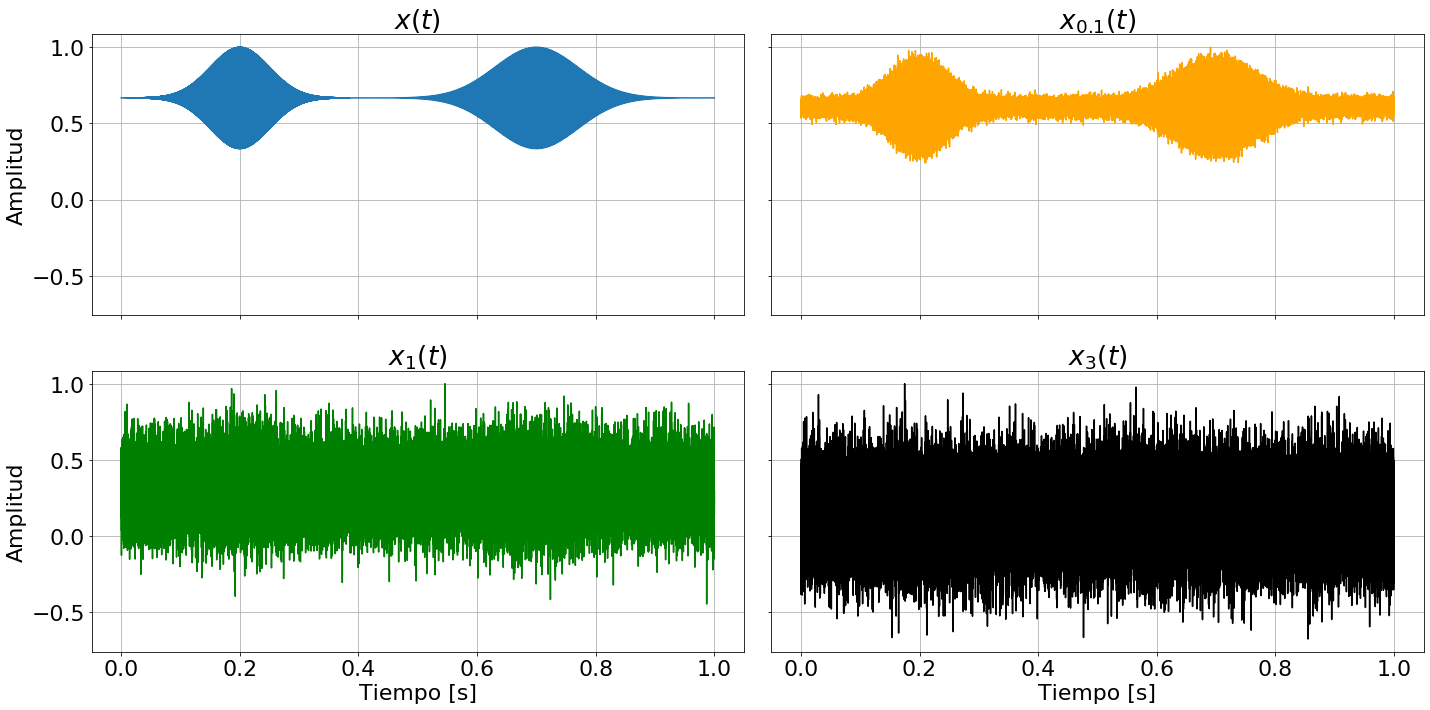

In [7]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, x)
axs[0, 0].set_title(r'$x(t)$')
axs[0, 1].plot(vector_t, x_con_ruido01, color='orange')
axs[0, 1].set_title('$x_{0.1}(t)$')
axs[1, 0].plot(vector_t, x_con_ruido1, color='green')
axs[1, 0].set_title('$x_1(t)$')
axs[1, 1].plot(vector_t, x_con_ruido3, color='black')
axs[1, 1].set_title('$x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()

### <center>Ploteo de la senal SIN la componente de Continua</center>

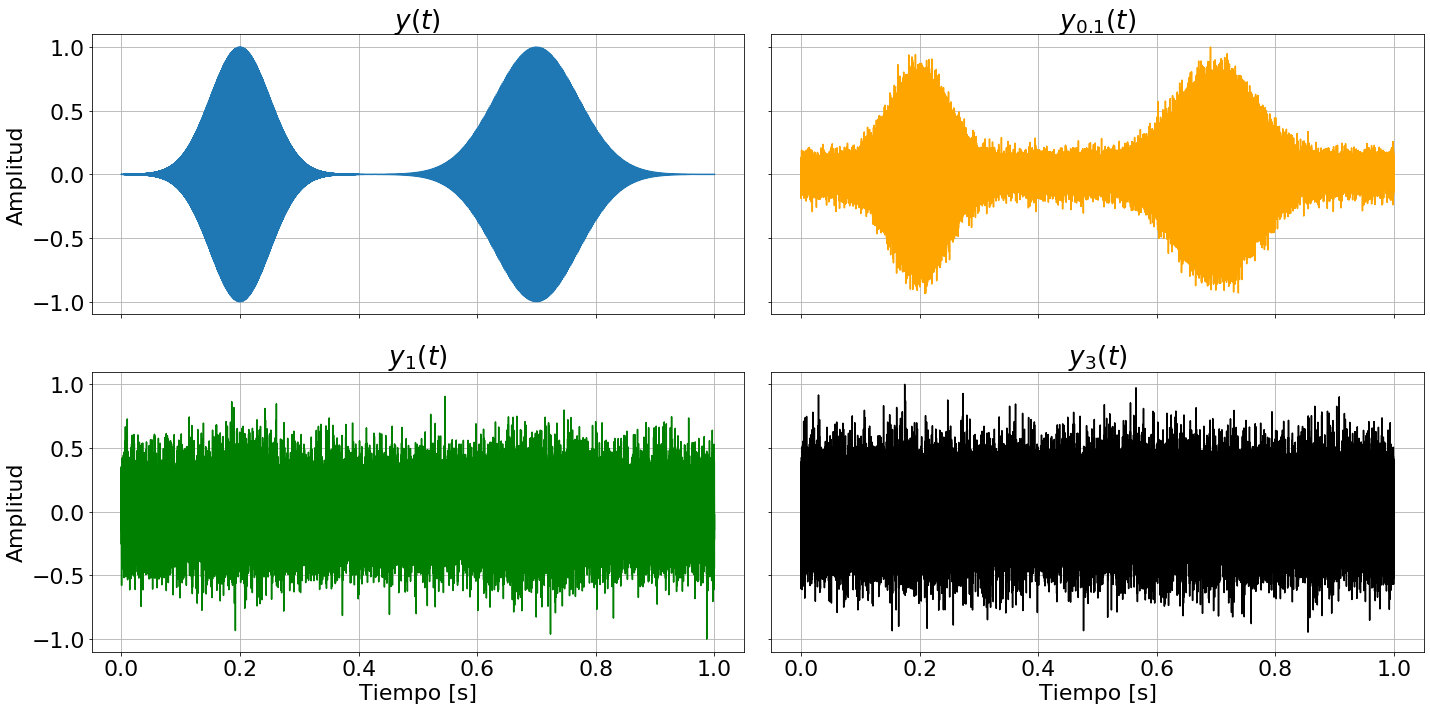

In [8]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, y)
axs[0, 0].set_title(r'$y(t)$')
axs[0, 1].plot(vector_t, y_con_ruido01, color='orange')
axs[0, 1].set_title('$y_{0.1}(t)$')
axs[1, 0].plot(vector_t, y_con_ruido1, color='green')
axs[1, 0].set_title('$y_1(t)$')
axs[1, 1].plot(vector_t, y_con_ruido3, color='black')
axs[1, 1].set_title('$y_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()

### <center>Tabla de comparacion de valores de SNR</center>

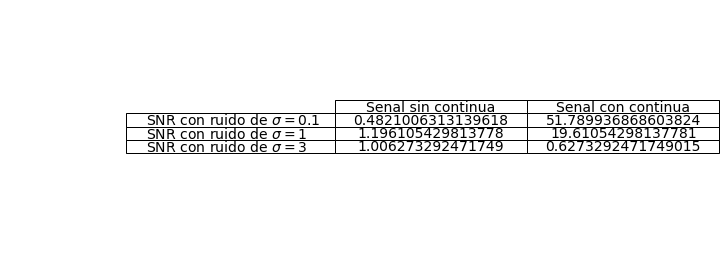

In [9]:
SNR_x01= max(x_con_ruido01)/desvio_estandar(ruido01)
SNR_x1= max(x_con_ruido1)/desvio_estandar(ruido1)
SNR_x3= max(x_con_ruido3)/desvio_estandar(ruido3)


SNR_y01= max(y_con_ruido01)/desvio_estandar(ruido01)
SNR_y1= max(y_con_ruido1)/desvio_estandar(ruido1)
SNR_y3= max(y_con_ruido3)/desvio_estandar(ruido3)


fig = plt.figure()
plt.axis('off')
plt.axis('tight')

data = [[d1, p1],
        [d2, p2],
        [d3, p3]]

columns = (['Senal sin continua', 'Senal con continua'])
rows = (["SNR con ruido de $\sigma = 0.1$", "SNR con ruido de $\sigma = 1$", "SNR con ruido de $\sigma = 3$"])

# Add a table at the bottom of the axes
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center',
                      cellLoc='center',
                      colLoc='center')
fig.tight_layout()
plt.show()

## <u>Ejercicio 5</u>:
Generar 10 señales de ruido, diferentes entre sí, con media nula y $\sigma = 3$, y sumarlas a la señal del punto 1. Deben quedar 10 señales diferentes con la información de la señal más el ruido. Luego, calcular la señal promedio de todas las señales con el ruido agregado, calcular la relación SNR de la señal promediada y comparar el valor con la obtenida en el punto 3. Volver a repetir el punto con 100 y 1000 señales en el promedio. A esta técnica se la denomina promedio en el ensamble, o simplemente promediado.

## <u>Respuesta</u>:
Utilizamos un promedio aritmetico para el calculo en este ejercicio.

In [10]:
total_10 = np.zeros_like(vector_t)
for i in range (10):
    noise = np.random.normal(0, 3, len(vector_t))
    signal_with_noise = x + noise
    total_10 += signal_with_noise
    
mean_10 = total_10/10

total_100 = np.zeros_like(vector_t)
for i in range (100):
    noise = np.random.normal(0, 3, len(vector_t))
    signal_with_noise = x + noise
    total_100 += signal_with_noise
    
mean_100 = total_100/100

total_1000 = np.zeros_like(vector_t)
for i in range (1000):
    noise = np.random.normal(0, 3, len(vector_t))
    signal_with_noise = x + noise
    total_1000 += signal_with_noise
    
mean_1000 = total_1000/1000

### <center>PLOT</center>

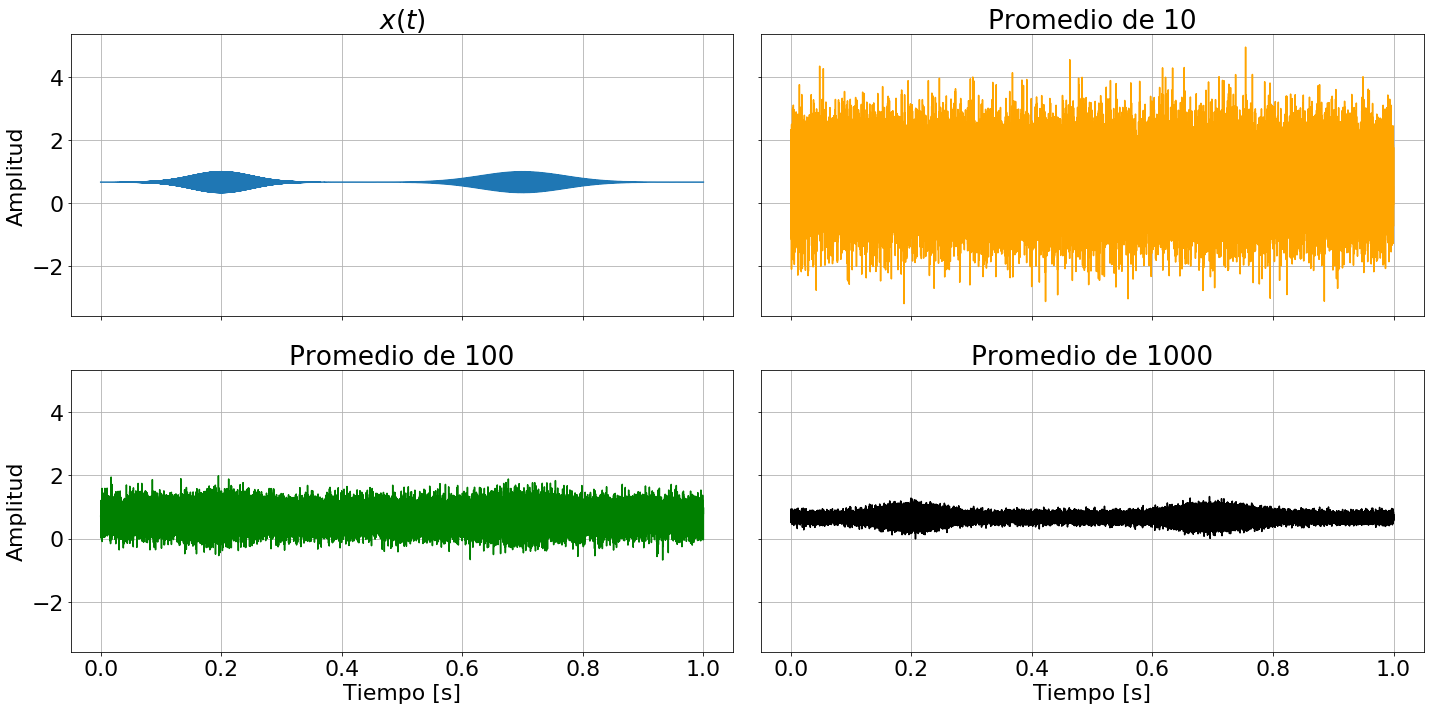

In [11]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, x)
axs[0, 0].set_title(r'$x(t)$')
axs[0, 1].plot(vector_t, mean_10, color='orange')
axs[0, 1].set_title('Promedio de 10')
axs[1, 0].plot(vector_t, mean_100, color='green')
axs[1, 0].set_title('Promedio de 100')
axs[1, 1].plot(vector_t, mean_1000, color='black')
axs[1, 1].set_title('Promedio de 1000')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()

### <center>TABLA DE COMPARACION</center>

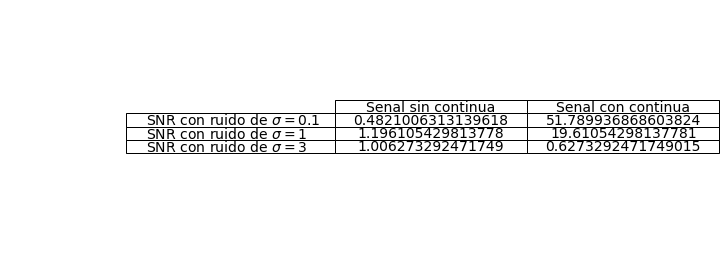

In [12]:
SNR_x01= max(x_con_ruido01)/desvio_estandar(ruido01)
SNR_x1= max(x_con_ruido1)/desvio_estandar(ruido1)
SNR_x3= max(x_con_ruido3)/desvio_estandar(ruido3)


SNR_y01= max(y_con_ruido01)/desvio_estandar(ruido01)
SNR_y1= max(y_con_ruido1)/desvio_estandar(ruido1)
SNR_y3= max(y_con_ruido3)/desvio_estandar(ruido3)


fig = plt.figure()
plt.axis('off')
plt.axis('tight')

data = [[d1, p1],
        [d2, p2],
        [d3, p3]]

columns = (['Senal sin continua', 'Senal con continua'])
rows = (["SNR con ruido de $\sigma = 0.1$", "SNR con ruido de $\sigma = 1$", "SNR con ruido de $\sigma = 3$"])

# Add a table at the bottom of the axes
the_table = plt.table(cellText=data,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center',
                      cellLoc='center',
                      colLoc='center')
fig.tight_layout()
plt.show()

## <u>Ejercicio 6</u>:
Se implementará ahora un filtro de media móvil (moving average) que responde a las ecuaciones de respuesta al impulso y relación entrada-salida que se dan a continuación. Esta es una de las tantas implementaciones posibles. Se pide, implementar dos funciones, una directa que se llame xfd = mediamovild(x,M), y otra implementación recursiva xfr = mediamovildr(x,M) que reciben como entrada a la señal x y la longitud de la ventana M del filtrado, y devuelve la señal filtrada xfd o xfr. Comparar los tiempos de ejecución de cada una. <br><br>
<center>
$h[n] = \frac{1}{M+1} \sum_{k=0}^{M} \delta[n+k]\;\;\;\;\;\;\;\;y[n] = \frac{1}{M+1} \sum_{k=0}^{M} x[n+k]$ 
</center>

Una vez implementado, determinar algún valor particular de $M$, explicando el criterio utilizado, para dejar pasar la componente de 0.5 kHz de la señal del punto 1, atenuando al menos un 90% de la señal de 10 kHz. Graficar los resultados.


## <u>Respuesta</u>:

###   METODO DIRECTO


La senal se atenuo en un:  96.28772948745153 %


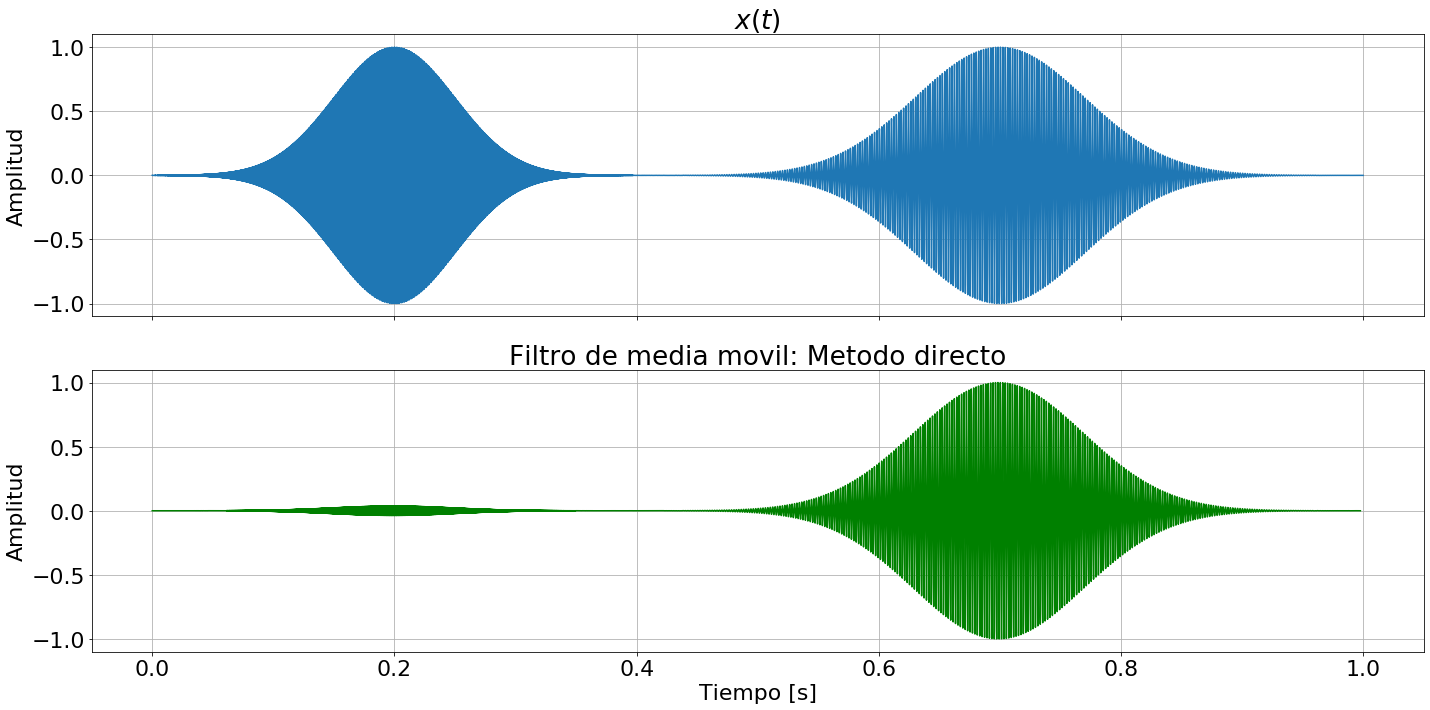

In [53]:
window_len = 101


start = time.time()
filtered_signal = mediamovild(y, window_len)
finish = time.time()
direct_method_time = finish-start

filtered_signal = filtered_signal/max(abs(filtered_signal))

plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=[20, 10])
axs[0].plot(vector_t, y)
axs[0].set_title(r'$x(t)$')
axs[1].plot(vector_t[:-window_len+1], filtered_signal, color='green')
axs[1].set_title('Filtro de media movil: Metodo directo')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()
    


print('La senal se atenuo en un: ',100*((max(y[:20000])-max(filtered_signal[:20000]))/max(y[:20000])),"%")

###   METODO RECURSIVO

La senal se atenuo en un:  96.26842063369966 %


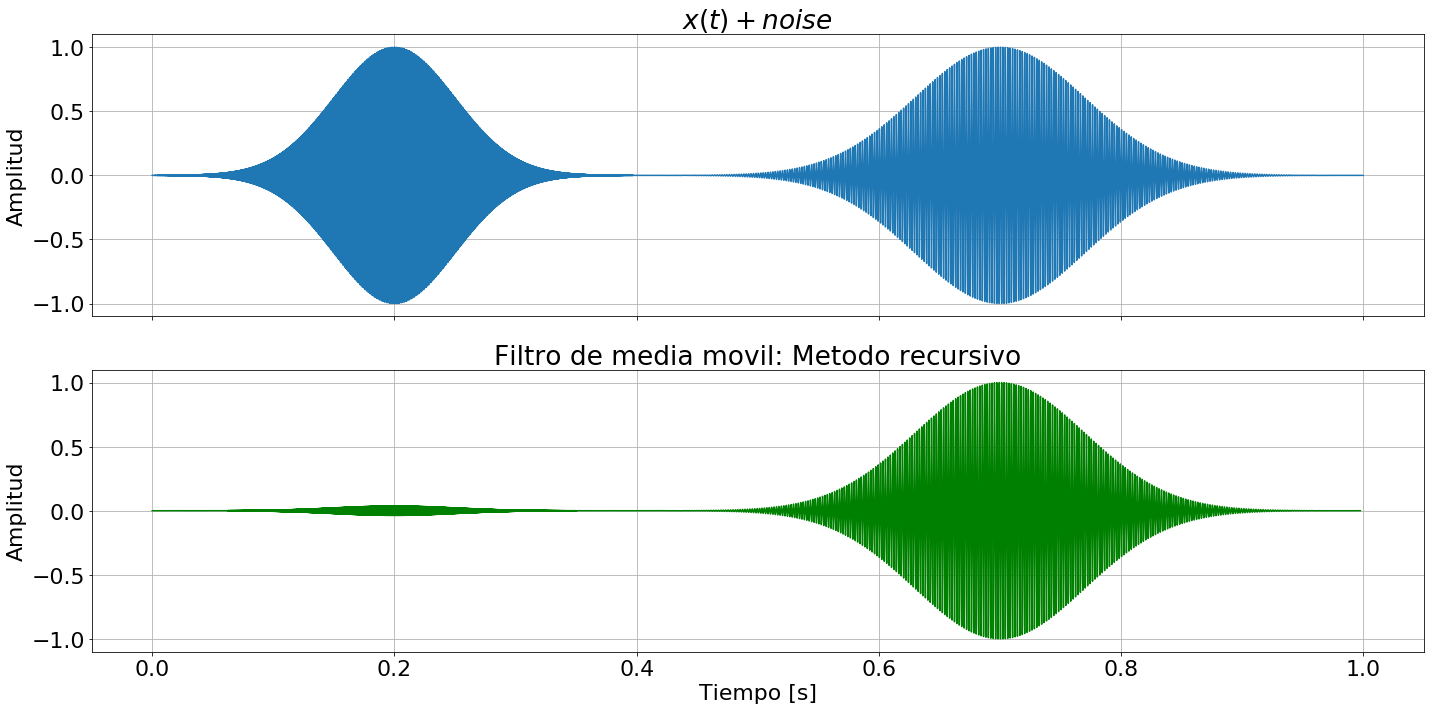

In [56]:
window_len = 101

start = time.time()
filtered_signal = mediamovildr(y, window_len)
finish = time.time()
recursive_method_time = finish-start

filtered_signal = filtered_signal/max(abs(filtered_signal))

plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=[20, 10])
axs[0].plot(vector_t, y)
axs[0].set_title(r'$x(t) + noise$')
axs[1].plot(vector_t[:-window_len+1], filtered_signal, color='green')
axs[1].set_title('Filtro de media movil: Metodo recursivo')
fig.tight_layout()
axs.flat[0].set(ylabel='Amplitud')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()
    
print('La senal se atenuo en un: ',100*((max(y[:20000])-max(filtered_signal[:20000]))/max(y[:20000])),"%")


In [60]:
print('El metodo directo tardo:', round(direct_method_time,3), 'segundos.')
print('El metodo recursivo tardo:', round(recursive_method_time,3), 'segundos.')

El metodo directo tardo: 0.427 segundos.
El metodo recursivo tardo: 0.063 segundos.


## <u>Ejercicio 7</u>:

Otra forma de aplicar un filtro es mediante la convolución de la señal con la respuesta al impulso del filtro. Repetir el punto 6 pero realizando el filtrado mediante la operación de convolución lineal con la respuesta al impulso dada en el punto 6. Utilizar el mismo valor de M que se seleccionó en el punto 6. Comparar gráficamente las señales filtradas del punto 6 y 7, con amplitud normalizada (máximo = 1).


## <u>Ejercicio 8</u>:
Repetir el punto 7, pero ahora la ventana a utilizar es una ventana de Blackman: <br><br>
<center>
$v[n] = a_0 + a_1 cos(\frac{2 \pi n}{M - 1})+ a_2 cos(\frac{4 \pi n}{M - 1})$ <br><br>
$a_0 = 0.42 \;\;\;\; a_1 = 0.5 \;\;\;\;\; a_2 = 0.08$
<center>


## <u>Ejercicio 9</u>:
En este punto se abordará el tema de la diferenciación numérica, a través de las diferencias finitas. Una de las formas más sencillas de definir a la derivada df(x)/dx en su versión discreta, en la muestra n, es a través de la diferencia finita de primer orden:<br><br>

<center>$f'[n] = \frac{f[n-1]-f[n]}{x[n-1]-x[n]}$</center>

A partir de esta definición, se pide calcular la derivada discreta de primer orden de la señal definida a continuación $f(t)$, de un 1 segundo de duración, muestreada a 44.1 kHz, compuesta de las siguientes señales (como la del punto 1 pero sin el seno ni el coseno):<br><br>

<center>
$f_1 (t) = 2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ <br>
$f_2 (t) = e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$f_3 (t) = e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>
</center>

Luego, sumarle a la señal $f(t)$ una señal de ruido blanco (distribución normal) con media nula y $\sigma = 0.01$ y calcularle la derivada discreta de primer orden. Comparar este resultado con el anterior.

## <u>Ejercicio 10</u>:

Convolucionar linealmente la señal "Midi69.wav" con la respuesta al impulso "resp_imp.wav". Luego convolucionar en forma circular las dos señales con un largo igual a la señal respuesta al impulso. Finalmente, calcular con convolución circular modificando las señales de forma tal de que el resultado sea igual a la convolución lineal. En todos los casos, graficar las señales convolucionadas y generar los archivos .wav correspondientes.
